<h1>Seaborn Tutorial

In [1]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sb

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


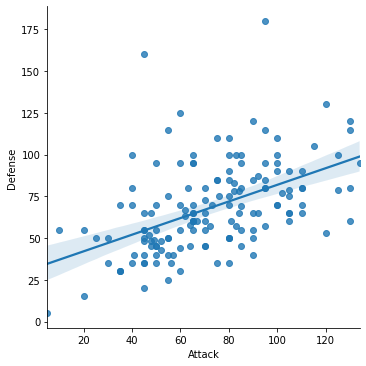

In [5]:
# Default ScatterplotPython
# Recommended way
sb.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

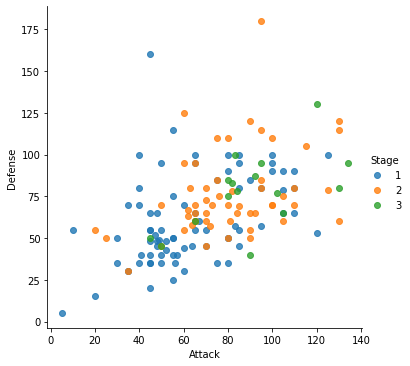

In [6]:
sb.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0.0, 140.45)

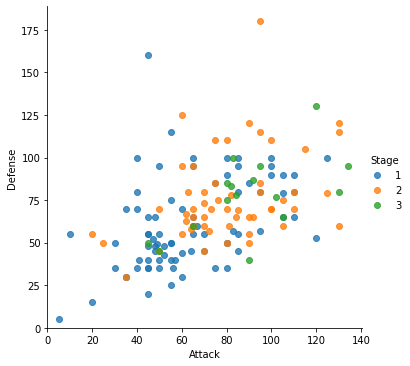

In [7]:
# Plot using Seaborn
sb.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

<AxesSubplot:>

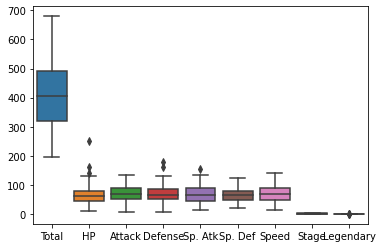

In [8]:
sb.boxplot(data=df)

<AxesSubplot:>

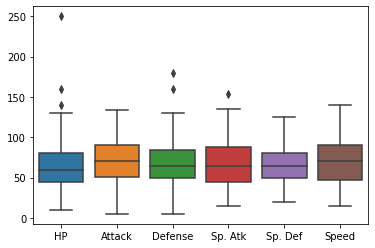

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sb.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

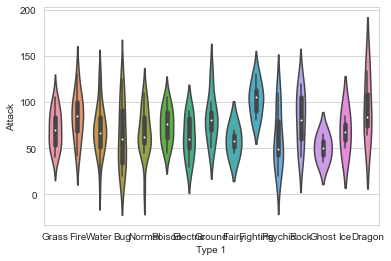

In [11]:
# Set theme
sb.set_style('whitegrid')
 
# Violin plot
sb.violinplot(x='Type 1', y='Attack', data=df)

In [12]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

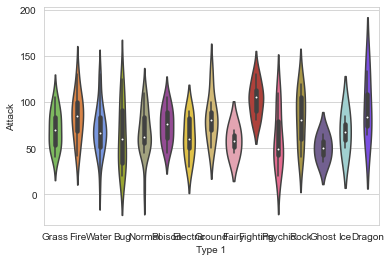

In [13]:
# Violin plot with Pokemon color palette
sb.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

c:\users\rdurgam\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

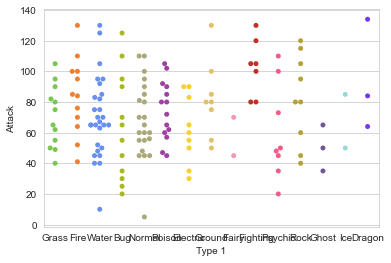

In [14]:
# Swarm plotPython
# Swarm plot with Pokemon color palette
sb.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

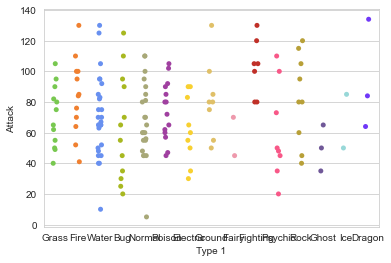

In [15]:
# Swarm plotPython
# Swarm plot with Pokemon color palette
sb.stripplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

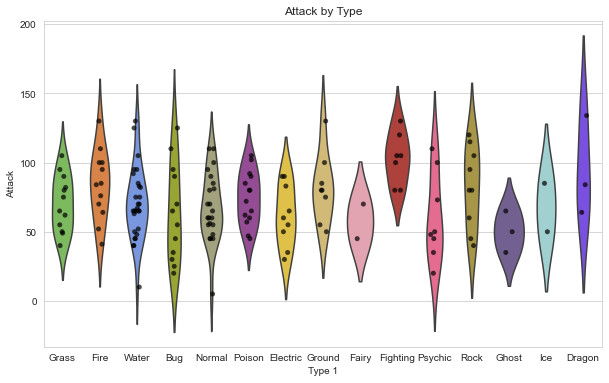

In [17]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sb.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sb.stripplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [18]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [19]:
# As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [20]:
melted_df.tail()

,Name,Type 1,Type 2,Stat,value
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130
905,Mew,Psychic,NaN,Speed,100


In [21]:
melted_df['Stat'].unique()

array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype=object)

<AxesSubplot:xlabel='Stat', ylabel='value'>

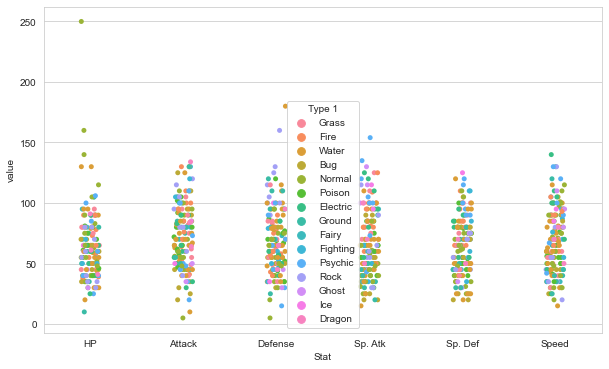

In [23]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
sb.stripplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

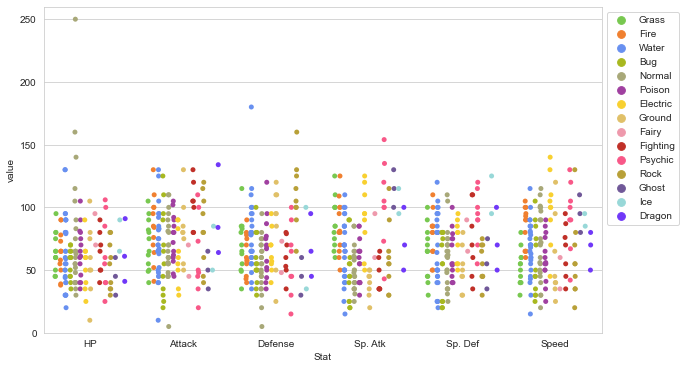

In [26]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sb.stripplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<h3>Heat map
   

<AxesSubplot:>

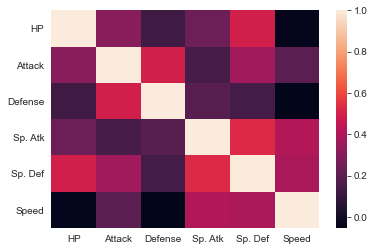

In [27]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sb.heatmap(corr)

<h3>Hitogram

<AxesSubplot:xlabel='Attack', ylabel='Count'>

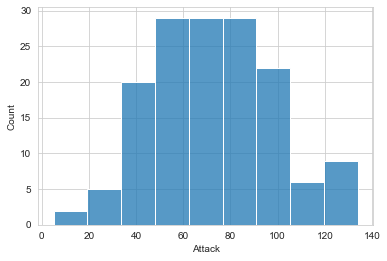

In [29]:
# Distribution Plot (a.k.a. Histogram)
sb.histplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

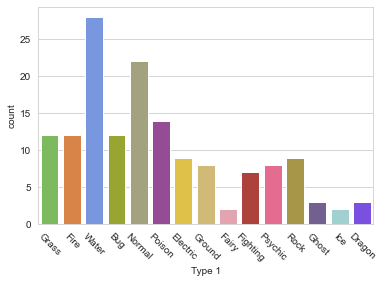

In [30]:
# Count Plot (a.k.a. Bar Plot)
sb.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

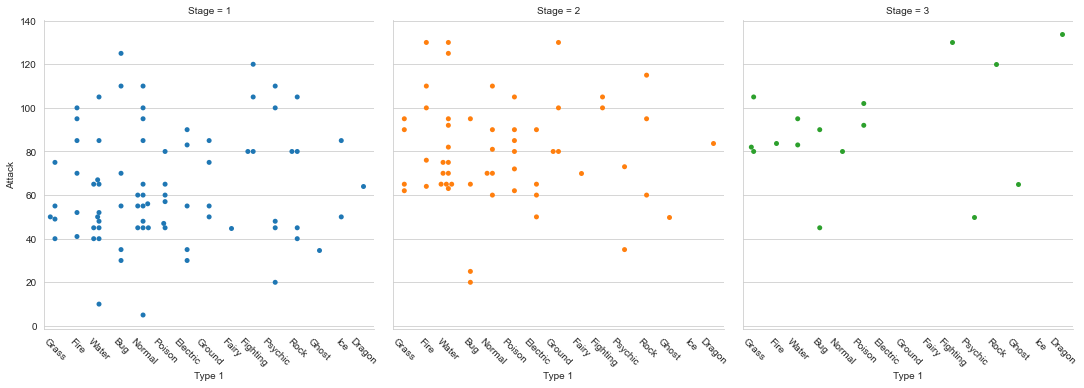

In [32]:
# Factor Plot
g = sb.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

c:\users\rdurgam\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

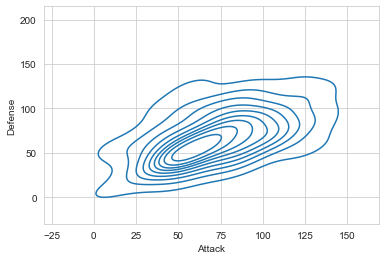

In [33]:
# Density Plot
sb.kdeplot(df.Attack, df.Defense)

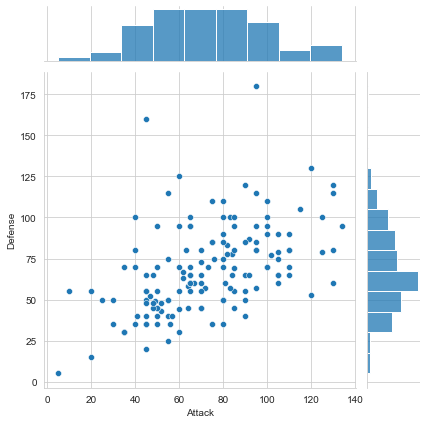

In [34]:
# Joint Distribution Plot
sb.jointplot(x='Attack', y='Defense', data=df)